<a href="https://colab.research.google.com/github/blazingbhavneek/ner_crf_tf/blob/main/NER_Bhavneek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2
## Bhavneek Singh
## 2020EE10482

In [1]:
import tensorflow as tf
import random 
import zipfile
import pandas as pd
import numpy as np

In [2]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/Assignment_2.zip", 'r') # mounted my gdrive
zip_ref.extractall("/tmp")
zip_ref.close()

In [3]:
def read_file(filename):
    with open(filename, "r") as file:
        text = file.readlines()
    return text

def process_text(text):
    X = []
    Y = []
    sentenceX = []
    sentenceY = []
    for line in text:
        split = line.split(" ")
        if len(split) > 1:
            sentenceX.append(split[0])
            sentenceY.append(split[1].replace("\n", ""))
        else:
            X.append(sentenceX)
            Y.append(sentenceY)
            sentenceX = []
            sentenceY = []
    return X, Y

text = read_file("/tmp/Assignment 2/data/train.txt")
X, Y = process_text(text)

text_test = read_file("/tmp/Assignment 2/data/test.txt")
X_test, Y_test = process_text(text_test)

In [4]:
ind = random.randint(0,len(X))

for i in range(len(X[ind])):
    print(X[ind][i], Y[ind][i])

But O
the B-NP
UAL I-NP
collapse I-NP
, O
he B-NP
says B-VP
, O
`` O
may B-VP
tell I-VP
you B-NP
it B-NP
's B-VP
not I-VP
going I-VP
to I-VP
work I-VP
that B-ADVP
easily I-ADVP
. O
'' O


In [5]:
labels = {'I-NP'} # Initialize a set of strings

for i in range(len(Y)):
    for j in range(len(Y[i])):
      labels.add(Y[i][j])

for i in range(len(Y_test)):
    for j in range(len(Y_test[i])):
      labels.add(Y_test[i][j])

labels = np.array(list(labels))
print(labels)
print(len(labels))

['B-SBAR' 'I-PP' 'I-UCP' 'B-INTJ' 'I-SBAR' 'B-CONJP' 'B-ADJP' 'I-INTJ'
 'I-ADVP' 'B-PRT' 'I-PRT' 'B-PP' 'I-ADJP' 'I-VP' 'B-UCP' 'I-LST' 'O'
 'B-LST' 'I-CONJP' 'B-NP' 'B-ADVP' 'B-VP' 'I-NP']
23


In [6]:
arr = np.arange(1,24) # 1-23 because we will have a 0 class for empty slots, i.e no word there
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])

In [7]:
dict = {}
for A, B in zip(labels, arr):
    dict[A] = B

In [8]:
dict

{'B-SBAR': 1,
 'I-PP': 2,
 'I-UCP': 3,
 'B-INTJ': 4,
 'I-SBAR': 5,
 'B-CONJP': 6,
 'B-ADJP': 7,
 'I-INTJ': 8,
 'I-ADVP': 9,
 'B-PRT': 10,
 'I-PRT': 11,
 'B-PP': 12,
 'I-ADJP': 13,
 'I-VP': 14,
 'B-UCP': 15,
 'I-LST': 16,
 'O': 17,
 'B-LST': 18,
 'I-CONJP': 19,
 'B-NP': 20,
 'B-ADVP': 21,
 'B-VP': 22,
 'I-NP': 23}

In [9]:
X_sentences = []
maxlen = 0
for i in range(len(X)):
  str = ""
  maxlen = max(maxlen,len(X[i]))
  for j in range(len(X[i])):
    str += X[i][j].lower()
    str += " "
  X_sentences.append(str)

In [10]:
Xt_sentences = []

for i in range(len(X_test)):
  str = ""
  maxlen = max(maxlen,len(X_test[i]))
  for j in range(len(X_test[i])):
    str += X_test[i][j].lower()
    str += " "
  Xt_sentences.append(str)

In [11]:
print(X_sentences[0])
print(Xt_sentences[0])
print(maxlen)

confidence in the pound is widely expected to take another sharp dive if trade figures for september , due for release tomorrow , fail to show a substantial improvement from july and august 's near-record deficits . 
rockwell international corp. 's tulsa unit said it signed a tentative agreement extending its contract with boeing co. to provide structural parts for boeing 's 747 jetliners . 
78


In [12]:
Y_labels = []

for i in range(len(Y)):
  arr = []
  for j in range(len(Y[i])):
    arr.append(int(dict[Y[i][j]]))
  arr = np.array(arr, dtype = 'int32').astype('int32')
  Y_labels.append(arr)

Y_labels = np.array(Y_labels)

<ipython-input-12-343049478399>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y_labels = np.array(Y_labels)


In [13]:
Yt_labels = []
for i in range(len(Y_test)):
  arr = []
  for j in range(len(Y_test[i])):
    arr.append(dict[Y_test[i][j]])
  arr = np.array(arr, dtype = 'int32').astype('int32')
  Yt_labels.append(arr)

Yt_labels = np.array(Yt_labels)

<ipython-input-13-98b44f0eacbe>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Yt_labels = np.array(Yt_labels)


In [30]:
print(Y_labels[:5])
print(Y_labels.shape)

[array([17, 19, 17,  4,  6, 15, 15, 15, 15, 17,  4,  4, 13, 17,  4, 19, 17,
         5, 20, 19, 17, 17,  5,  6, 15, 15, 17,  4,  4, 19, 17,  4,  4, 17,
         4,  4,  5], dtype=int32)
 array([ 5, 19, 17,  4, 17,  4, 17,  4,  4, 19, 17,  4,  4,  4,  6, 15, 15,
        15, 17,  4, 19, 17, 19, 17,  4,  4,  5], dtype=int32)
 array([ 5, 17,  6, 17,  4, 19, 17,  6, 15, 15, 19, 17,  4, 17,  4,  6, 15,
        17,  4,  4,  4, 19, 17,  4,  4,  4, 17,  4,  5], dtype=int32)
 array([17,  6, 15, 17,  4, 19, 17,  4,  6, 15, 15, 15, 17,  4, 19, 17,  4,
        19, 17,  4,  4,  4,  4,  6, 15, 17,  4,  5, 17,  5, 17,  4,  4,  4,
         6,  5], dtype=int32)
 array([ 5, 17,  4, 19, 17, 19, 17,  4,  4,  4,  6, 12,  2, 19, 17,  4,  4,
         5,  5,  6, 17,  4,  5, 17,  4,  4, 19, 17,  4,  4,  5],
       dtype=int32)                                                        ]
(8936,)


In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
Ytrain = pad_sequences(Y_labels, maxlen = maxlen,  padding = 'post', truncating = 'post')

In [15]:
print(Ytrain[:5])
print(Ytrain.shape)

[[20 12 20 23 22 14 14 14 14 20 23 23  1 20 23 12 20 17  7 12 20 20 17 22
  14 14 20 23 23 12 20 23 23 20 23 23 17  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [17 12 20 23 20 23 20 23 23 12 20 23 23 23 22 14 14 14 20 23 12 20 12 20
  23 23 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [17 20 22 20 23 12 20 22 14 14 12 20 23 20 23 22 14 20 23 23 23 12 20 23
  23 23 20 23 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [20 22 14 20 23 12 20 23 22 14 14 14 20 23 12 20 23 12 20 23 23 23 23 22
  14 20 23 17 20 17 20 23 23 23 22 17  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [17 20 23 12 20 12 20 23 23

In [16]:
from tensorflow.keras.utils import to_categorical
Ytrain_cat = to_categorical(Ytrain)

In [34]:
print(Ytrain_cat[0])
Ytrain_cat.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


(8936, 78, 24)

In [17]:
Ytest = pad_sequences(Yt_labels, maxlen = maxlen,  padding = 'post', truncating = 'post')
Ytest_cat = to_categorical(Ytest)

In [18]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_sentences)
word2index = tokenizer.word_index

In [19]:
Xtokens = tokenizer.texts_to_sequences(X_sentences)
Xtrain = pad_sequences(Xtokens, maxlen = maxlen,  padding = 'post', truncating = 'post')

In [18]:
Xtrain[0]

array([1600,    5,    1, 1517,   11, 1160,  192,    3,  224,  273, 1202,
       4919,   75,  489,  605,    7,  473,  252,    7, 1816, 2587, 4139,
          3,  606,    4, 1375, 1439,   16,  753,    6,  588,    8,  754,
        525, 8485,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

In [38]:
type(Xtrain[0][0])

numpy.int32

In [20]:
X_test_tokens = tokenizer.texts_to_sequences(Xt_sentences)
Xtest = pad_sequences(X_test_tokens, maxlen = maxlen,  padding = 'post', truncating = 'post')
Xtest[0]

array([  235,    71,     8, 12484,   216,    12,    13,  2256,     4,
        4284,   459,    25,   478,    21,  4296,    95,     3,   876,
        1697,  1007,     7,  4296,     8,  5793,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0], dtype=int32)

In [21]:
file = open('/content/drive/My Drive/glove.6B.100d.txt', 'r', encoding = 'utf8')
content = file.readlines()
file.close()

In [22]:
embeddings = {}

for line in content:
    line = line.split()
    embeddings[line[0]] = np.array(line[1:], dtype = float)

In [23]:
embed_size = 100 # The vector size we chose
embedding_matrix = np.zeros((len(word2index)+1, embed_size)) # initializing a 0 matrix

miss_count = 0

for word, i in word2index.items():
  if word in embeddings.keys(): # Some words are not present
    embed_vector = embeddings[word]
    embedding_matrix[i] = embed_vector
  else:
    miss_count+=1
    embedding_matrix[i] = np.random.rand(100) # Initializing a random vector for them

print(miss_count)

357


In [44]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Bidirectional

model = Sequential([
    tf.keras.layers.Input(shape=(78), dtype='int32'),
    Embedding(input_dim = len(word2index) + 1,
              output_dim = embed_size,
              input_length = maxlen,
              weights = [embedding_matrix],
              trainable = True # We have a 357 random vectors in the matrix
             ),
    
    Bidirectional(LSTM(units = 64, return_sequences = True)),
    Bidirectional(LSTM(units = 16, return_sequences = True)),
    Dense(24, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 78, 100)           1489400   
                                                                 
 bidirectional (Bidirectiona  (None, 78, 128)          84480     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 78, 32)           18560     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 78, 24)            792       
                                                                 
Total params: 1,593,232
Trainable params: 1,593,232
Non-trainable params: 0
_________________________________________________________________


In [51]:
print(Xtrain.shape)
print(Ytrain_cat.shape)
print(Xtest.shape)
print(Ytest_cat.shape)

(8936, 78)
(8936, 78, 24)
(2012, 78)
(2012, 78, 24)


In [33]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="tmp/checkpoint/",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [52]:
history_1 = model.fit(Xtrain, Ytrain_cat, epochs = 20, validation_data=(Xtest,Ytest_cat), callbacks=[model_checkpoint_callback])

Epoch 1/20
280/280 [==============================] - 85s 266ms/step - loss: 0.7174 - accuracy: 0.7881 - val_loss: 0.5708 - val_accuracy: 0.7992
Epoch 2/20
280/280 [==============================] - 67s 239ms/step - loss: 0.4918 - accuracy: 0.8229 - val_loss: 0.5278 - val_accuracy: 0.8134
Epoch 3/20
280/280 [==============================] - 69s 246ms/step - loss: 0.4473 - accuracy: 0.8378 - val_loss: 0.5233 - val_accuracy: 0.8198
Epoch 4/20
280/280 [==============================] - 70s 250ms/step - loss: 0.4152 - accuracy: 0.8477 - val_loss: 0.5195 - val_accuracy: 0.8216
Epoch 5/20
280/280 [==============================] - 69s 247ms/step - loss: 0.3863 - accuracy: 0.8566 - val_loss: 0.5143 - val_accuracy: 0.8245
Epoch 6/20
280/280 [==============================] - 70s 250ms/step - loss: 0.3597 - accuracy: 0.8665 - val_loss: 0.5525 - val_accuracy: 0.8235
Epoch 7/20
280/280 [==============================] - 68s 241ms/step - loss: 0.3349 - accuracy: 0.8759 - val_loss: 0.5583 - val_ac

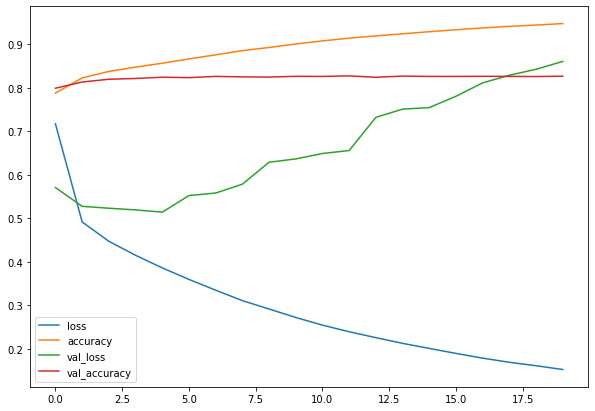

In [57]:
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

In [53]:
model.load_weights("tmp/checkpoint/")

In [54]:
model.save("tmp/bhavneek_model.h5")

In [55]:
from google.colab import files
files.download("tmp/bhavneek_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
files.download("tmp/checkpoint/checkpoint")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
loaded_model = tf.keras.models.load_model("/content/drive/My Drive/bhavneek_model.h5")

In [25]:
embedding_layer = loaded_model.get_layer('embedding')
embedding_weights = embedding_layer.get_weights()[0]

In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Bidirectional

model_2 = Sequential([
    tf.keras.layers.Input(shape=(78), dtype='int32'),
    tf.keras.layers.Embedding(
        input_dim=embedding_weights.shape[0],
        output_dim=embedding_weights.shape[1],
        weights=[embedding_weights],
        trainable=False
    ),
    
    Bidirectional(LSTM(units = 128, return_sequences = True)),
    Bidirectional(LSTM(units = 128, return_sequences = True)),
    Dense(24, activation = 'softmax')
])

model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [31]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 78, 100)           1489400   
                                                                 
 bidirectional_2 (Bidirectio  (None, 78, 256)          234496    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 78, 256)          394240    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 78, 24)            6168      
                                                                 
Total params: 2,124,304
Trainable params: 634,904
Non-trainable params: 1,489,400
_________________________________________________________________


In [34]:
history_2 = model_2.fit(Xtrain, Ytrain_cat, epochs = 10, validation_data=(Xtest,Ytest_cat), callbacks=[model_checkpoint_callback])

Epoch 1/10
280/280 [==============================] - 6s 22ms/step - loss: 0.3496 - accuracy: 0.8699 - val_loss: 0.6046 - val_accuracy: 0.8233
Epoch 2/10
280/280 [==============================] - 6s 22ms/step - loss: 0.2825 - accuracy: 0.8956 - val_loss: 0.6899 - val_accuracy: 0.8257
Epoch 3/10
280/280 [==============================] - 5s 17ms/step - loss: 0.2550 - accuracy: 0.9063 - val_loss: 0.6552 - val_accuracy: 0.8268
Epoch 4/10
280/280 [==============================] - 5s 20ms/step - loss: 0.2310 - accuracy: 0.9156 - val_loss: 0.7217 - val_accuracy: 0.8275
Epoch 5/10
280/280 [==============================] - 5s 18ms/step - loss: 0.2167 - accuracy: 0.9208 - val_loss: 0.6871 - val_accuracy: 0.8294
Epoch 6/10
280/280 [==============================] - 5s 17ms/step - loss: 0.2046 - accuracy: 0.9258 - val_loss: 0.6585 - val_accuracy: 0.8302
Epoch 7/10
280/280 [==============================] - 6s 21ms/step - loss: 0.1915 - accuracy: 0.9308 - val_loss: 0.7680 - val_accuracy: 0.8288

In [35]:
history_2_2 = model_2.fit(Xtrain, Ytrain_cat, epochs = 10, validation_data=(Xtest,Ytest_cat), callbacks=[model_checkpoint_callback])

Epoch 1/10
280/280 [==============================] - 5s 17ms/step - loss: 0.1515 - accuracy: 0.9463 - val_loss: 0.8359 - val_accuracy: 0.8301
Epoch 2/10
280/280 [==============================] - 5s 17ms/step - loss: 0.1428 - accuracy: 0.9494 - val_loss: 0.8970 - val_accuracy: 0.8309
Epoch 3/10
280/280 [==============================] - 6s 20ms/step - loss: 0.1315 - accuracy: 0.9537 - val_loss: 0.8257 - val_accuracy: 0.8302
Epoch 4/10
280/280 [==============================] - 5s 17ms/step - loss: 0.1220 - accuracy: 0.9574 - val_loss: 0.9424 - val_accuracy: 0.8311
Epoch 5/10
280/280 [==============================] - 5s 20ms/step - loss: 0.1123 - accuracy: 0.9610 - val_loss: 0.9644 - val_accuracy: 0.8310
Epoch 6/10
280/280 [==============================] - 5s 18ms/step - loss: 0.1036 - accuracy: 0.9645 - val_loss: 1.0364 - val_accuracy: 0.8297
Epoch 7/10
280/280 [==============================] - 5s 16ms/step - loss: 0.0983 - accuracy: 0.9662 - val_loss: 1.0430 - val_accuracy: 0.8300

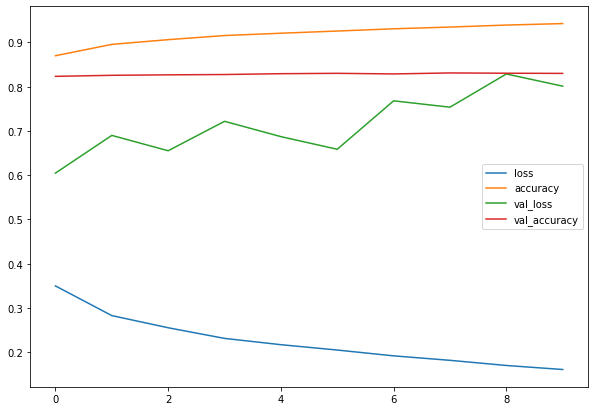

In [38]:
pd.DataFrame(history_2.history).plot(figsize=(10, 7));

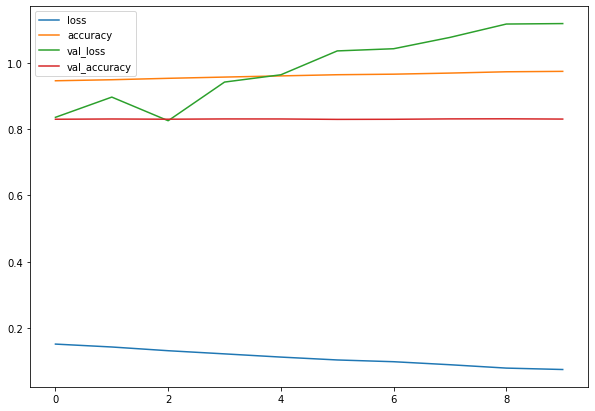

In [37]:
pd.DataFrame(history_2_2.history).plot(figsize=(10, 7));

Runtime keeps disconnecting, model is too big to train

In [39]:
model_2.load_weights("tmp/checkpoint/")
model_2.save("tmp/bhavneek_model_2.h5")

from google.colab import files
files.download("tmp/bhavneek_model_2.h5")
files.download("tmp/checkpoint/checkpoint")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
Y_pred_cat_1 = loaded_model.predict(Xtest)
Y_pred_cat_2 = model_2.predict(Xtest)

63/63 [==============================] - 2s 9ms/step


In [42]:
print(Y_pred_cat_1.shape)
print(Y_pred_cat_2.shape)

(2012, 78, 24)
(2012, 78, 24)


In [43]:
from tensorflow.python.ops.math_ops import argmax
Y_pred_label_1 = []
Y_pred_label_2 = []

for i in range(len(Y_pred_cat_1)):
  arr1 = []
  arr2 = []
  for j in range(len(Y_pred_cat_1[i])):
    arr1.append(argmax(Y_pred_cat_1[i][j]))
    arr2.append(argmax(Y_pred_cat_2[i][j]))
  arr1 = np.array(arr1)
  arr2 = np.array(arr2)
  Y_pred_label_1.append(arr1)
  Y_pred_label_2.append(arr2)

Y_pred_label_1 = np.array(Y_pred_label_1)
Y_pred_label_2 = np.array(Y_pred_label_2)

In [44]:
print(Y_pred_label_1.shape)
print(Y_pred_label_2.shape)

(2012, 78)
(2012, 78)


In [48]:
from itertools import chain

Y_test_flat = list(chain.from_iterable(Ytest))
Y_pred_flat_1 = list(chain.from_iterable(Y_pred_label_1))
Y_pred_flat_2 = list(chain.from_iterable(Y_pred_label_2))

In [46]:
from sklearn.metrics import f1_score

def get_scores(predY, trueY):
  print("Micro F1 score: ", f1_score(trueY, predY, average="micro"))
  print("Macro F1 score: ", f1_score(trueY, predY, average="macro"))
  print("Average F1 score: ", (f1_score(trueY, predY, average="micro") + f1_score(trueY, predY, average="macro")) / 2)

In [49]:
get_scores(Y_pred_flat_1, Y_test_flat)

Micro F1 score:  0.7014770352245502
Macro F1 score:  0.05445911463788042
Average F1 score:  0.3779680749312153


In [50]:
get_scores(Y_pred_flat_2, Y_test_flat)

Micro F1 score:  0.8314790742723148
Macro F1 score:  0.30469352810425854
Average F1 score:  0.5680863011882866


Model 2 works significantly better

In [51]:
arr = np.arange(1,24)

dict2 = {}
for A, B in zip(labels, arr):
    dict2[B] = A

dict2

{1: 'B-SBAR',
 2: 'I-PP',
 3: 'I-UCP',
 4: 'B-INTJ',
 5: 'I-SBAR',
 6: 'B-CONJP',
 7: 'B-ADJP',
 8: 'I-INTJ',
 9: 'I-ADVP',
 10: 'B-PRT',
 11: 'I-PRT',
 12: 'B-PP',
 13: 'I-ADJP',
 14: 'I-VP',
 15: 'B-UCP',
 16: 'I-LST',
 17: 'O',
 18: 'B-LST',
 19: 'I-CONJP',
 20: 'B-NP',
 21: 'B-ADVP',
 22: 'B-VP',
 23: 'I-NP'}

In [52]:
Y_pred_2 = []

for i in range(len(Y_pred_label_2)):
  arr = []
  for j in range(len(Y_pred_label_2[i])):
    if Y_pred_label_2[i][j] == 0:
      continue
    else:
      arr.append(dict2[Y_pred_label_2[i][j]])
  arr = np.array(arr)
  Y_pred_2.append(arr)

Y_pred_2 = np.array(Y_pred_2)

<ipython-input-52-1c7942c01ab9>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y_pred_2 = np.array(Y_pred_2)


In [58]:
ind = random.randint(0,len(Y_pred_2))
print(Xt_sentences[ind])
print(len(Y_test[ind]), Y_test[ind])
print(len(Y_pred_2[ind]), Y_pred_2[ind])

microsoft corp. 's earnings growth continued to outstrip that of most of its competitors and customers in the personal-computer industry , as it reported a 36 % jump in fiscal first-quarter earnings on a 33 % revenue gain . 
39 ['B-NP', 'I-NP', 'B-NP', 'I-NP', 'I-NP', 'B-VP', 'I-VP', 'I-VP', 'B-NP', 'B-PP', 'B-NP', 'B-PP', 'B-NP', 'I-NP', 'I-NP', 'I-NP', 'B-PP', 'B-NP', 'I-NP', 'I-NP', 'O', 'B-SBAR', 'B-NP', 'B-VP', 'B-NP', 'I-NP', 'I-NP', 'I-NP', 'B-PP', 'B-NP', 'I-NP', 'I-NP', 'B-PP', 'B-NP', 'I-NP', 'I-NP', 'I-NP', 'I-NP', 'O']
39 ['B-NP' 'I-NP' 'B-NP' 'I-NP' 'I-NP' 'B-VP' 'B-PP' 'B-NP' 'B-PP' 'B-NP'
 'B-PP' 'B-NP' 'I-NP' 'O' 'B-NP' 'B-PP' 'B-NP' 'I-NP' 'I-NP' 'I-NP' 'B-PP'
 'B-SBAR' 'B-NP' 'B-VP' 'B-NP' 'I-NP' 'I-NP' 'I-NP' 'B-PP' 'B-NP' 'I-NP'
 'I-NP' 'B-PP' 'B-NP' 'I-NP' 'I-NP' 'I-NP' 'I-NP' 'O']


In [65]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Bidirectional

model_3 = Sequential([
    tf.keras.layers.Input(shape=(78), dtype='int32'),
    tf.keras.layers.Embedding(
        input_dim=embedding_weights.shape[0],
        output_dim=embedding_weights.shape[1],
        weights=[embedding_weights],
        trainable=True
    ),
    
    Bidirectional(LSTM(units = 512, return_sequences = True)),
    Bidirectional(LSTM(units = 256, return_sequences = True)),
    Bidirectional(LSTM(units = 128, return_sequences = True)),
    Bidirectional(LSTM(units = 64, return_sequences = True)),
    Dense(24, activation = 'softmax')
])

model_3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [66]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 78, 100)           1489400   
                                                                 
 bidirectional_12 (Bidirecti  (None, 78, 1024)         2510848   
 onal)                                                           
                                                                 
 bidirectional_13 (Bidirecti  (None, 78, 512)          2623488   
 onal)                                                           
                                                                 
 bidirectional_14 (Bidirecti  (None, 78, 256)          656384    
 onal)                                                           
                                                                 
 bidirectional_15 (Bidirecti  (None, 78, 128)          164352    
 onal)                                                

In [67]:
history_3 = model_3.fit(Xtrain, Ytrain_cat, epochs = 10, validation_data=(Xtest,Ytest_cat), callbacks=[model_checkpoint_callback])

Epoch 1/10
280/280 [==============================] - 45s 111ms/step - loss: 0.5707 - accuracy: 0.7959 - val_loss: 0.5485 - val_accuracy: 0.8167
Epoch 2/10
280/280 [==============================] - 21s 75ms/step - loss: 0.3619 - accuracy: 0.8706 - val_loss: 0.5971 - val_accuracy: 0.8242
Epoch 3/10
280/280 [==============================] - 19s 69ms/step - loss: 0.2834 - accuracy: 0.8989 - val_loss: 0.6158 - val_accuracy: 0.8253
Epoch 4/10
280/280 [==============================] - 18s 63ms/step - loss: 0.2359 - accuracy: 0.9150 - val_loss: 0.6404 - val_accuracy: 0.8251
Epoch 5/10
280/280 [==============================] - 17s 61ms/step - loss: 0.2050 - accuracy: 0.9263 - val_loss: 0.7043 - val_accuracy: 0.8275
Epoch 6/10
280/280 [==============================] - 18s 64ms/step - loss: 0.1779 - accuracy: 0.9363 - val_loss: 0.8157 - val_accuracy: 0.8276
Epoch 7/10
280/280 [==============================] - 17s 61ms/step - loss: 0.1553 - accuracy: 0.9451 - val_loss: 0.7979 - val_accuracy

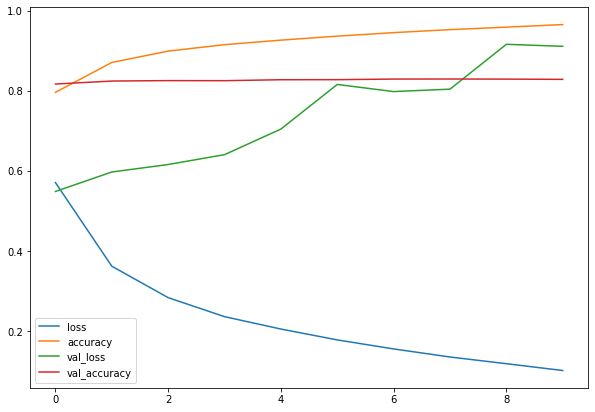

In [68]:
pd.DataFrame(history_3.history).plot(figsize=(10, 7));

In [72]:
model_3.save("tmp/bhavneek_model_3.h5")

from google.colab import files
files.download("tmp/bhavneek_model_3.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
Y_pred_cat_3 = model_3.predict(Xtest)

63/63 [==============================] - 5s 23ms/step


In [76]:
from tensorflow.python.ops.math_ops import argmax
Y_pred_label_3 = []

for i in range(len(Y_pred_cat_3)):
  arr3 = []
  for j in range(len(Y_pred_cat_3[i])):
    arr3.append(argmax(Y_pred_cat_3[i][j]))
  arr3 = np.array(arr3)
  Y_pred_label_3.append(arr3)

Y_pred_label_3 = np.array(Y_pred_label_3)

In [78]:
from itertools import chain
Y_pred_flat_3 = list(chain.from_iterable(Y_pred_label_3))

In [79]:
get_scores(Y_pred_flat_3, Y_test_flat)

Micro F1 score:  0.8280445531936586
Macro F1 score:  0.26701954519991744
Average F1 score:  0.547532049196788


Almost same as model_2

In [81]:
embedding_layer_3 = model_3.get_layer('embedding_4')
embedding_weights_3 = embedding_layer_3.get_weights()[0]

In [97]:
!pip install tensorflow-addons
import tensorflow_addons as tfa
from keras_contrib.layers import CRF
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Bidirectional

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [116]:
import tensorflow as tf
import tensorflow.keras.backend as K
import tensorflow.keras.layers as L
from tensorflow_addons.text import crf_log_likelihood, crf_decode


class CRF(L.Layer):
    def __init__(self,
                 output_dim,
                 sparse_target=True,
                 **kwargs):
        """    
        Args:
            output_dim (int): the number of labels to tag each temporal input.
            sparse_target (bool): whether the the ground-truth label represented in one-hot.
        Input shape:
            (batch_size, sentence length, output_dim)
        Output shape:
            (batch_size, sentence length, output_dim)
        """
        super(CRF, self).__init__(**kwargs)
        self.output_dim = int(output_dim) 
        self.sparse_target = sparse_target
        self.input_spec = L.InputSpec(min_ndim=3)
        self.supports_masking = False
        self.sequence_lengths = None
        self.transitions = None

    def build(self, input_shape):
        assert len(input_shape) == 3
        f_shape = tf.TensorShape(input_shape)
        input_spec = L.InputSpec(min_ndim=3, axes={-1: f_shape[-1]})

        if f_shape[-1] is None:
            raise ValueError('The last dimension of the inputs to `CRF` '
                             'should be defined. Found `None`.')
        if f_shape[-1] != self.output_dim:
            raise ValueError('The last dimension of the input shape must be equal to output'
                             ' shape. Use a linear layer if needed.')
        self.input_spec = input_spec
        self.transitions = self.add_weight(name='transitions',
                                           shape=[self.output_dim, self.output_dim],
                                           initializer='glorot_uniform',
                                           trainable=True)
        self.built = True

    def compute_mask(self, inputs, mask=None):
        # Just pass the received mask from previous layer, to the next layer or
        # manipulate it if this layer changes the shape of the input
        return mask

    def call(self, inputs, sequence_lengths=None, training=None, **kwargs):
        sequences = tf.convert_to_tensor(inputs, dtype=self.dtype)
        if sequence_lengths is not None:
            assert len(sequence_lengths.shape) == 2
            assert tf.convert_to_tensor(sequence_lengths).dtype == 'int32'
            seq_len_shape = tf.convert_to_tensor(sequence_lengths).get_shape().as_list()
            assert seq_len_shape[1] == 1
            self.sequence_lengths = K.flatten(sequence_lengths)
        else:
            self.sequence_lengths = tf.ones(tf.shape(inputs)[0], dtype=tf.int32) * (
                tf.shape(inputs)[1]
            )

        viterbi_sequence, _ = crf_decode(sequences,
                                         self.transitions,
                                         self.sequence_lengths)
        output = K.one_hot(viterbi_sequence, self.output_dim)
        return K.in_train_phase(sequences, output)

    @property
    def loss(self):
        def crf_loss(y_true, y_pred):
            y_pred = tf.convert_to_tensor(y_pred, dtype=self.dtype)
            log_likelihood, self.transitions = crf_log_likelihood(
                y_pred,
                tf.cast(K.argmax(y_true), dtype=tf.int32) if self.sparse_target else y_true,
                self.sequence_lengths,
                transition_params=self.transitions,
            )
            return tf.reduce_mean(-log_likelihood)
        return crf_loss

    @property
    def accuracy(self):
        def viterbi_accuracy(y_true, y_pred):
            # -1e10 to avoid zero at sum(mask)
            mask = K.cast(
                K.all(K.greater(y_pred, -1e10), axis=2), K.floatx())
            shape = tf.shape(y_pred)
            sequence_lengths = tf.ones(shape[0], dtype=tf.int32) * (shape[1])
            y_pred, _ = crf_decode(y_pred, self.transitions, sequence_lengths)
            if self.sparse_target:
                y_true = K.argmax(y_true, 2)
            y_pred = K.cast(y_pred, 'int32')
            y_true = K.cast(y_true, 'int32')
            corrects = K.cast(K.equal(y_true, y_pred), K.floatx())
            return K.sum(corrects * mask) / K.sum(mask)
        return viterbi_accuracy

    def compute_output_shape(self, input_shape):
        tf.TensorShape(input_shape).assert_has_rank(3)
        return input_shape[:2] + (self.output_dim,)

    def get_config(self):
        config = {
            'output_dim': self.output_dim,
            'sparse_target': self.sparse_target,
            'supports_masking': self.supports_masking,
            'transitions': K.eval(self.transitions)
        }
        base_config = super(CRF, self).get_config()
        return dict(base_config, **config)

In [124]:
input_layer = tf.keras.layers.Input(shape=(78), dtype='int32')

embedding_layer = embedding_layer_3(input_layer)

lstm_layer_1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128, return_sequences=True))(embedding_layer)
lstm_layer_2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128, return_sequences=True))(lstm_layer_1)

linear_layer = tf.keras.layers.Dense(24)(lstm_layer_2)
crf = CRF(24)
output_layer = crf(linear_layer)

model_4 = tf.keras.Model(inputs=input_layer, outputs=output_layer)

model_4.compile(optimizer='adam', loss=crf.loss, metrics=[crf.accuracy])

TypeError: ignored

In [131]:
!pip install keras-crf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [139]:
from keras_crf import CRFModel

model_4 = Sequential()
model_4.add(tf.keras.layers.Input(shape=(78), dtype='int32'))
model_4.add(embedding_layer_3)
model_4.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128, return_sequences=True)))
model_4.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128, return_sequences=True)))
model_4.add(Dense(256))
model_4.compile('adam', loss=crf.loss, metrics=[crf.accuracy])

model_4crf = CRFModel(model_4, 24)

model_4crf.compile(
    optimizer='adam',
    metrics=['acc'],
    )
model_4crf.summary()

Model: "crf_model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_39 (InputLayer)          [(None, 78)]         0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 78, 100)      1489400     ['input_39[0][0]']               
                                                                                                  
 bidirectional_82 (Bidirectiona  (None, 78, 256)     234496      ['embedding_4[31][0]']           
 l)                                                                                               
                                                                                                  
 bidirectional_83 (Bidirectiona  (None, 78, 256)     394240      ['bidirectional_82[0][0

In [140]:
history_4 = model_4crf.fit(Xtrain, Ytrain_cat, epochs = 10, validation_data=(Xtest,Ytest_cat), callbacks=[model_checkpoint_callback])

Epoch 1/10


ValueError: ignored